## GRIP: The Sparks Foundation

## Data Science and Buisness Analytics Internship

#### NAME: DARSHAN M

#### BATCH:JULY 2021

#### Problem Statement

#### Task-1: Predict the percentage of the student based on the number of study hours

#### Dataset Description ---> Working with the data

1) Hours: The number of hours the student studies

2) Scores: The score the student secures

#### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Let's read the data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

#### Printing the first five and last five observations of the data

In [3]:
df.head(5) ### first five observations

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail(5) ## last five observations

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


#### Interpretation:-

1) The dataset is a very simple dataset with only two features(hours and scores) 

#### Lets look into the information of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### The dataset is having a total of 25 rows and 2 columns we can also get to know about this using the shape function.Let's look into it as well

In [6]:
df.shape

(25, 2)

#### Let's check for missing values in the dataset

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### NOTE:- Our dataset is clean dataset and it does not possess any missing values

#### Five point summary  of the dataset

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Interpretation:-

From the above five point summary we can observe how the data is spread over the quantile ranges(25%,50%,75%) and we also get to know about the mean,standard deviation,min and the max of the data.We can also come down to the following conclusions from the dataset that is listed as below


1) **Minimum hours** of study=1.10 hours

2) **Maximum hours** of study=9.20 hours

3) **Minimum score** secured=17

4) **Maximum score** secured=95



#### Let's see for how many hours the topper of the class has studied

In [9]:
df[df.Scores==df.Scores.max()]

,Hours,Scores
15,8.9,95


We can say that the Topper of the class has studied for 8.9 hours

#### Exploratory Data Analysis(EDA):-

Exploratory data analysis is an important step in any research analysis. It searches for patterns and relationships in the data. In other words, we may explain EDA as a process to summarise the crucial characteristics of the data to get better insights.

In [10]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

1) Measures of central tendency

In [11]:
df.mean() ### The average number of observations of the data

Hours      5.012
Scores    51.480
dtype: float64

#### Interpretation:-

The average number of study hours of the student is 5 hours and the average score is 51.48

In [12]:
df.median() ### The 50% distribution of the data

Hours      4.8
Scores    47.0
dtype: float64

#### Distribution of the data

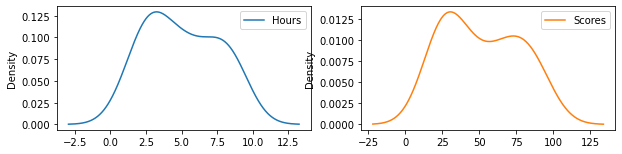

In [13]:
# set plot size
plt.rcParams["figure.figsize"] = [10,5]

# plot density plot using plot()
# kind: set the type of plot
# subplots: indicates whether to plot subplot for each variable or a single line plot
# layout: specify the arrangement of the subplots
# sharex: indicates whether to have the same scale on x-axis of all subplots
df.plot(kind = 'density', subplots = True, layout = (2,2), sharex = False)

# show plot
plt.show()

#### A boxplot visual of the distribution of the data

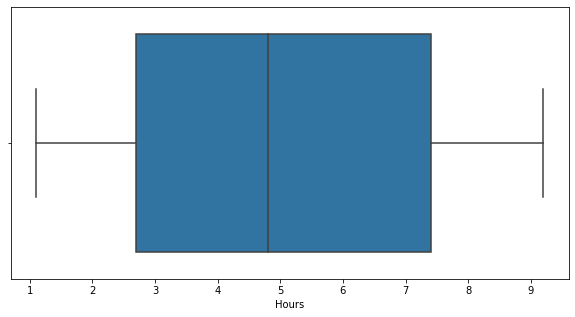

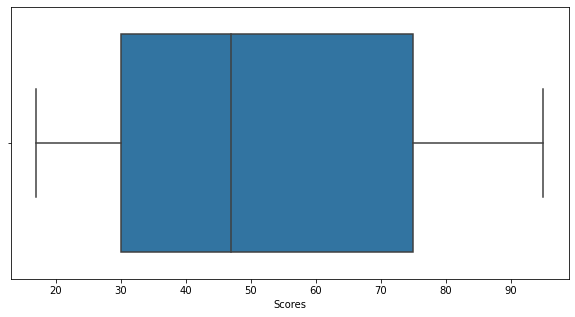

In [14]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

#### Interpretation:-

We can see there are no presence of outliers in both the features of the dataset

#### Lets check the correlation strength of the data

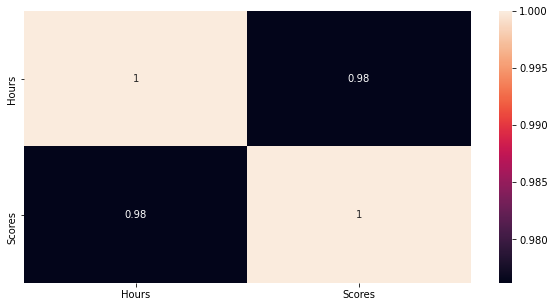

In [15]:
sns.heatmap(df.corr(),annot=True)
plt.show()

#### Interpretation:-

We can visualise through the various plots above the distribution of the data.We can see that our target variable hours is continuos which implies the satisfaction of the one of the assumption of linear regression that is **Target variable must be continous**

#### Linear Regression model

#### Separating the dependent and independent variables

In [16]:
X=df.drop('Scores',axis=1)
y=df['Scores']  ## target variable

#### Splitting the data into train and test

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Linear Regression model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lr=LinearRegression()

In [22]:
lr_model=lr.fit(X_train,y_train)

In [23]:
r_sq1=lr_model.score(X_train,y_train)

In [24]:
print('The r-squared value of the model is',round(r_sq1,3))

The r-squared value of the model is 0.954


#### Interpretation:-

We can see that there is **95.4% of total variation** explained by the target variable

####  **Model performance measures**

In [25]:
train_pred=lr_model.predict(X_train)
test_pred=lr_model.predict(X_test)

In [26]:
from sklearn.metrics import *

1) Root Mean Squared Error(**RMSE**)

In [27]:
# calculate the MSE using the "mean_squared_error" function

# MSE for the train data
mse_train = mean_squared_error(y_train, train_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_train = round(np.sqrt(mse_train), 4)

# print the RMSE for the train set
print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

# MSE for the test data
mse_test = mean_squared_error(y_test, test_pred)

# take the square root of the MSE to calculate the RMSE
# round the value upto 4 digits using 'round()'
rmse_test = round(np.sqrt(mse_test), 4)

# print the RMSE for the test set
print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  5.6455
Root Mean Squared Error (RMSE) on test set:  4.9066


#### NOTE:-

**Lower** the value of RMSE better is the model

2) Mean Absolute Error(**MAE**)

In [28]:
mae_train = round(mean_absolute_error(y_train, train_pred),4)

# print the MAE for the training set
print("Mean Absolute Error (MAE) on training set: ", mae_train)

# calculate the MAE for the test data
# round the value upto 4 digits using 'round()'
mae_test = round(mean_absolute_error(y_test, test_pred),4)

# print the MAE for the test set
print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  5.092
Mean Absolute Error (MAE) on test set:  4.564


3) Mean Absolute Percentage Error(**MAPE**)

In [29]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [30]:
# calculate the mape using the "mape()" function created above

# calculate the MAPE for the train data
# round the value upto 4 digits using 'round()'
mape_train = round(mape(y_train, train_pred),4)

# print the MAPE for the training set
print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)

# calculate the MAPE for the test data
# round the value upto 4 digits using 'round()'
mape_test = round(mape(y_test, test_pred),4)

# print the MAPE for the test set
print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  10.9695
Mean Absolute Percentage Error (MAPE) on test set:  12.5972


#### Interpretation:-

From all the above model measures we can observe the model has attempted neither to overfit or underfit.It falls mostly in the acceptable range.But when considered with the error terms in hand we can see that the error for train is a bit higher which may be an indication of overfitting with respect to the training set

#### Residual Distribution Check

In [36]:
resid=y_test-test_pred

In [37]:
from statsmodels.graphics.gofplots import qqplot

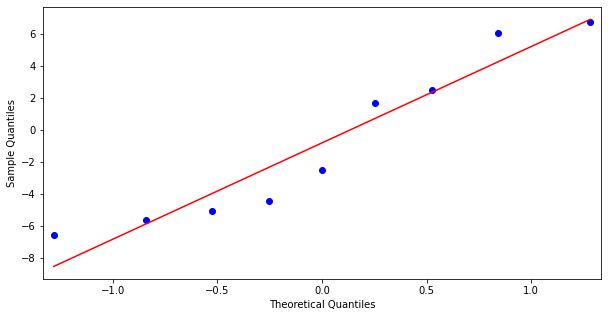

In [38]:
qqplot(resid,line='r')
plt.show()

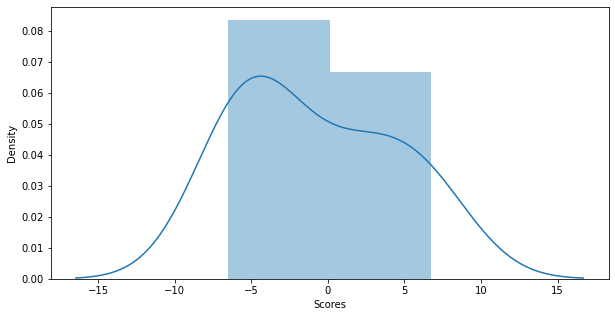

In [41]:
sns.distplot(resid)
plt.show()

#### Interpretation:-


From the above plots of distribution of residuals we can say that the error terms are distributed near to normal distribution

#### Comparing Model Performance

In [31]:
y_pred=lr_model.predict(X_test)

In [32]:
# create the table for all the model performance metrics
# metrics considered for model comparision are MSE, RMSE, MAE and MAPE
# create a list of column names
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

# creating a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

In [33]:
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [34]:
# calculate R-squared, Adjusted R-squared, MSE, RMSE, MAE and MAPE for full model
# use 'rsquared' to calculate R-squared value
# use 'rsquared_adj' to calculate Adjusted R-squared value
# use 'mean_squared_error' to calculate MSE
# use 'rmse' to calculate RMSE
# use 'mean_absolute_error' to calculate MAE
# use the defined function 'mape' to calculate MAPE
MLR_full_model_metrics = pd.Series({'Model_Name': "Linear_Regression_Model",
                     'R-squared': r_sq1,
                     'MSE': mean_squared_error(y_test, y_pred),
                     'RMSE': rmse(y_test, y_pred),
                     'MAE': mean_absolute_error(y_test, y_pred),
                     'MAPE': mape(y_test, y_pred)
                   })

# append the values to the result table
result_table = result_table.append(MLR_full_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,Linear_Regression_Model,0.954335,NaN,24.074686,4.906596,4.564015,12.597239


#### Prediction from the model 

Lets try to **predict the score of the student if he studies for 9.25hours/day**

In [45]:
hours=9.25

prediction=lr_model.predict([[hours]])

In [46]:
print('If the student studies for {} hours he might score {}'.format(hours,prediction))

If the student studies for 9.25 hours he might score [92.67022038]


#### NOTE:-

The model has predicted that if the student studies for **9.25 hous/day** he might score **92.67**

#### Scope of Improvement from the existing model

1) We have only two features present in the dataset.With more number of features in hand we can take up more model improvement steps such as RFE,Stepwise Feature Selection(Backward and Forward)

2) We have only numerical features in the dataset.If we had categorical columns we could have taken up steps like encoding


#### Conclusion:-

We came to know that the topper of the class studies for 8.9 hours and he has secured the marks of 95.All the plots showed normal distribution of the features itself.We did not see any presence of outliers and the data in hand did not have any missing values.So we need not to take up the data missing treatment.

The average student studies for about 5 hours and from this we can say that mostly if all students study for more than 5hours could help them to secure better scores.Even the model prediction show-cased a result where in if the student studied for 9.25 hours/day he would secure a score of 92.67.

#### --------------------------------------------THANK YOU--------------------------------------------------------------------------------